# COVID-19 Global Impact Tracker

This notebook analyzes global COVID-19 trends using real-world data from [Our World in Data](https://github.com/owid/covid-19-data). It explores confirmed cases, deaths, and vaccination rollouts across selected countries. Visual insights are included to make findings easy to digest.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load and Preview Data

In [2]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Clean and Prepare Data

In [3]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Select countries
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Drop missing key values
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing numeric
df_filtered = df_filtered.fillna(0)

## Total COVID-19 Cases Over Time

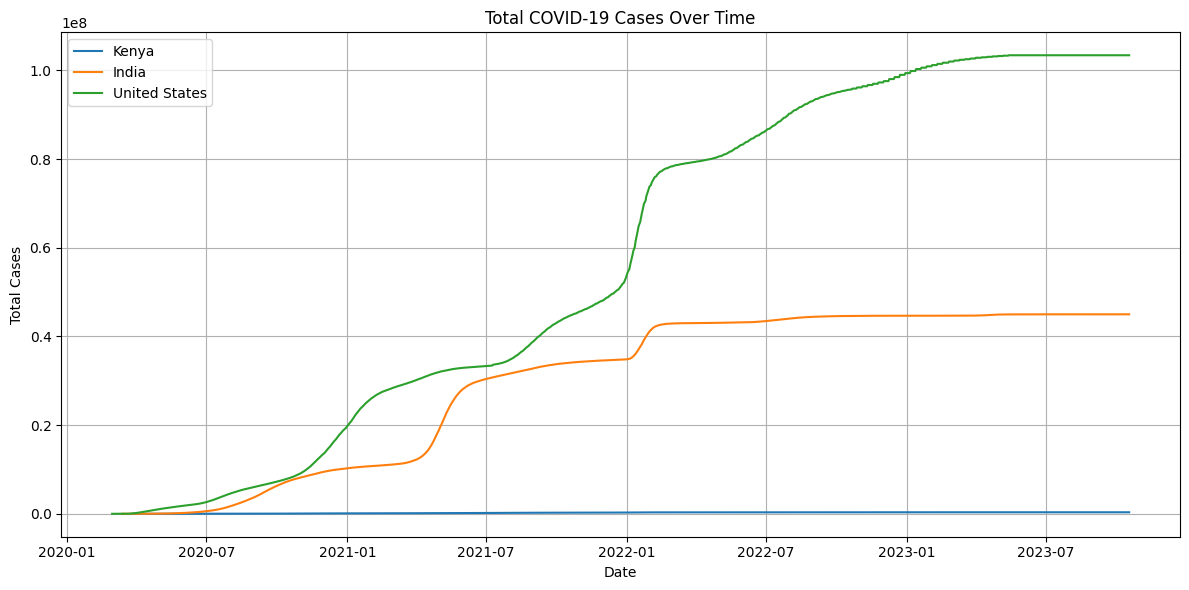

In [4]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Daily New Cases

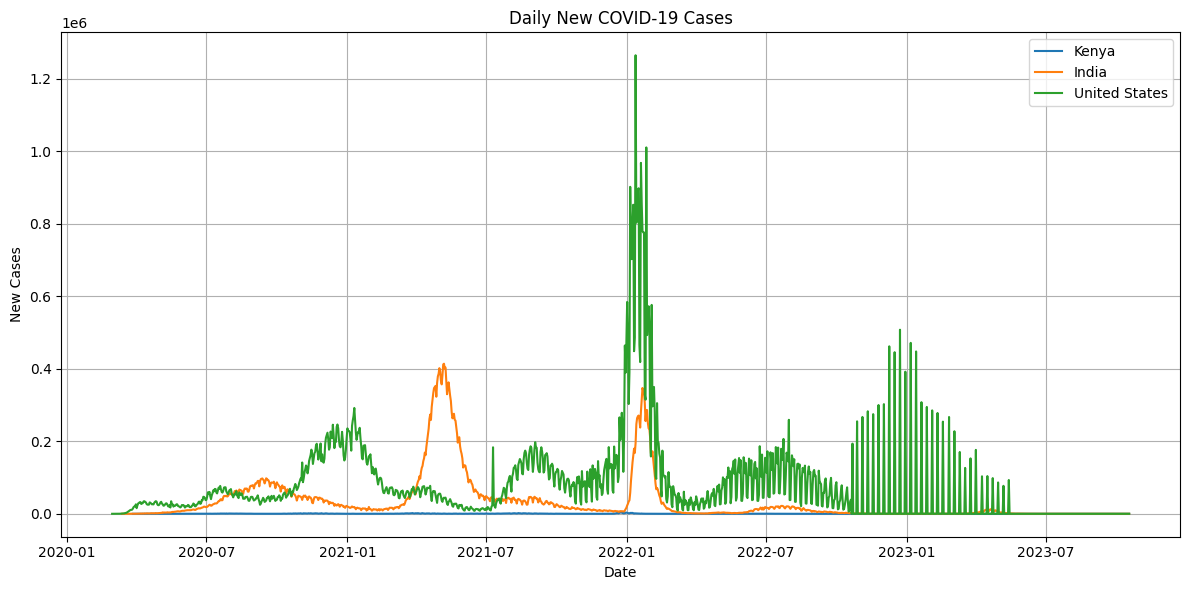

In [5]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Death Rate Calculation

In [6]:
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered.groupby('location')['death_rate'].mean()

location
India            0.014528
Kenya            0.019512
United States    0.018585
Name: death_rate, dtype: float64

## Total Vaccinations Over Time

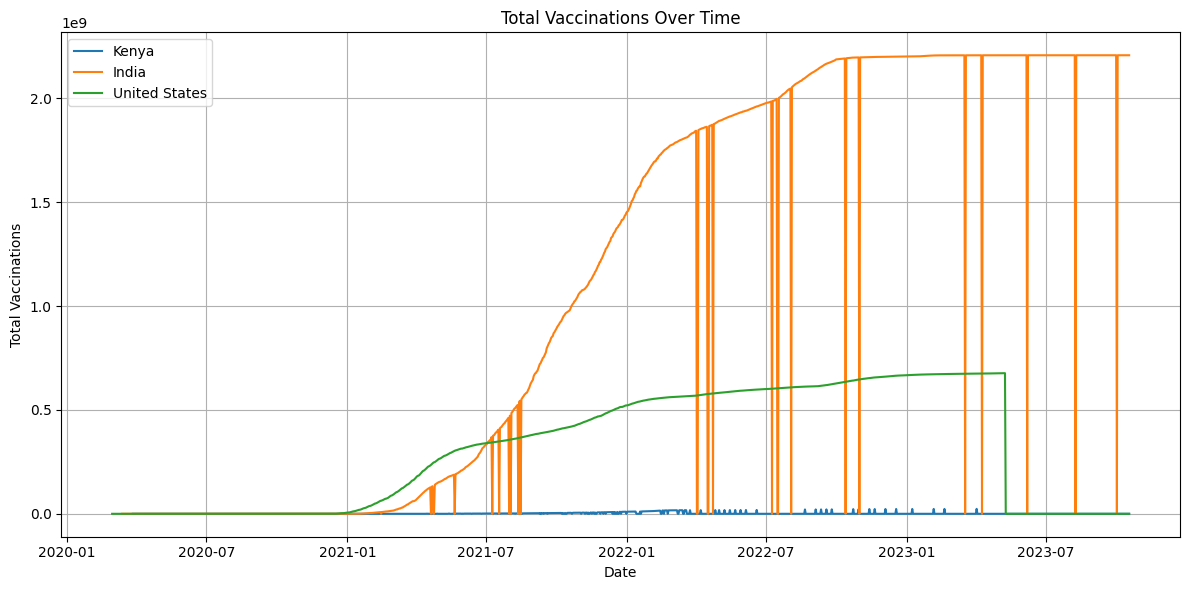

In [7]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Side-by-Side Choropleth Maps

In [8]:
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]
df_latest = df_latest[df_latest['iso_code'].str.len() == 3]

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]],
                    subplot_titles=(f"Total Cases as of {latest_date.date()}",
                                    f"Total Vaccinations as of {latest_date.date()}"))

# Total Cases
fig.add_trace(
    go.Choropleth(
        locations=df_latest['iso_code'],
        z=df_latest['total_cases'],
        text=df_latest['location'],
        colorscale='Reds',
        colorbar_title="Cases",
        zmin=0,
        zmax=df_latest['total_cases'].max()
    ),
    row=1, col=1
)

# Total Vaccinations
fig.add_trace(
    go.Choropleth(
        locations=df_latest['iso_code'],
        z=df_latest['total_vaccinations'],
        text=df_latest['location'],
        colorscale='Blues',
        colorbar_title="Vaccinations",
        zmin=0,
        zmax=df_latest['total_vaccinations'].max()
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Global COVID-19 Snapshot',
    geo=dict(showframe=False, showcoastlines=False),
    geo2=dict(showframe=False, showcoastlines=False),
    height=600,
    width=1100
)

fig.show()

## Key Insights:

1. India experienced the sharpest spike in daily new cases during April–May 2021.
2. The U.S. had the earliest and fastest vaccine rollout.
3. Kenya’s vaccination rate started slow but improved by 2022.
4. Early phases had higher death rates due to overwhelmed health systems.
5. Countries with higher vaccination rates tended to show lower new case rates.

## Conclusion

This analysis highlights the differences in COVID-19 impact and response strategies across countries. It also shows how vaccination rates influenced the course of the pandemic. Future work could involve real-time dashboards or regional health system impact.